In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix,roc_auc_score,roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [2]:
data=pd.read_excel('/content/sample_data/BCDexcel.xlsx')

In [3]:
data.head()

,Study ID,Patient ID,Sample ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,...,Relapse Free Status (Months),Relapse Free Status,Number of Samples Per Patient,Sample Type,Sex,3-Gene classifier subtype,TMB (nonsynonymous),Tumor Size,Tumor Stage,Patient's Vital Status
0,brca_metabric,MB-0000,MB-0000,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,NO,claudin-low,...,138.65,0:Not Recurred,1,Primary,Female,ER-/HER2-,0.000000,22.0,2.0,Living
1,brca_metabric,MB-0002,MB-0002,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,NO,LumA,...,83.52,0:Not Recurred,1,Primary,Female,ER+/HER2- High Prolif,2.615035,10.0,1.0,Living
2,brca_metabric,MB-0005,MB-0005,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,YES,LumB,...,151.28,1:Recurred,1,Primary,Female,NaN,2.615035,15.0,2.0,Died of Disease
3,brca_metabric,MB-0006,MB-0006,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,YES,LumB,...,162.76,0:Not Recurred,1,Primary,Female,NaN,1.307518,25.0,2.0,Living
4,brca_metabric,MB-0008,MB-0008,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,YES,LumB,...,18.55,1:Recurred,1,Primary,Female,ER+/HER2- High Prolif,2.615035,40.0,2.0,Died of Disease


In [4]:
data.columns

Index(['Study ID', 'Patient ID', 'Sample ID', 'Age at Diagnosis',
       'Type of Breast Surgery', 'Cancer Type', 'Cancer Type Detailed',
       'Cellularity', 'Chemotherapy', 'Pam50 + Claudin-low subtype', 'Cohort',
       'ER status measured by IHC', 'ER Status', 'Neoplasm Histologic Grade',
       'HER2 status measured by SNP6', 'HER2 Status',
       'Tumor Other Histologic Subtype', 'Hormone Therapy',
       'Inferred Menopausal State', 'Integrative Cluster',
       'Primary Tumor Laterality', 'Lymph nodes examined positive',
       'Mutation Count', 'Nottingham prognostic index', 'Oncotree Code',
       'Overall Survival (Months)', 'Overall Survival Status', 'PR Status',
       'Radio Therapy', 'Relapse Free Status (Months)', 'Relapse Free Status',
       'Number of Samples Per Patient', 'Sample Type', 'Sex',
       '3-Gene classifier subtype', 'TMB (nonsynonymous)', 'Tumor Size',
       'Tumor Stage', 'Patient's Vital Status'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2509 entries, 0 to 2508
Data columns (total 39 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Study ID                        2509 non-null   object 
 1   Patient ID                      2509 non-null   object 
 2   Sample ID                       2509 non-null   object 
 3   Age at Diagnosis                2498 non-null   float64
 4   Type of Breast Surgery          1955 non-null   object 
 5   Cancer Type                     2509 non-null   object 
 6   Cancer Type Detailed            2509 non-null   object 
 7   Cellularity                     1917 non-null   object 
 8   Chemotherapy                    1980 non-null   object 
 9   Pam50 + Claudin-low subtype     1980 non-null   object 
 10  Cohort                          2498 non-null   float64
 11  ER status measured by IHC       2426 non-null   object 
 12  ER Status                       24

In [6]:
data.drop(['Patient ID','Sample ID','Integrative Cluster'],axis=1,inplace=True)

In [7]:
data.dropna(inplace = True)

In [8]:
data.isnull().sum()

Study ID                          0
Age at Diagnosis                  0
Type of Breast Surgery            0
Cancer Type                       0
Cancer Type Detailed              0
Cellularity                       0
Chemotherapy                      0
Pam50 + Claudin-low subtype       0
Cohort                            0
ER status measured by IHC         0
ER Status                         0
Neoplasm Histologic Grade         0
HER2 status measured by SNP6      0
HER2 Status                       0
Tumor Other Histologic Subtype    0
Hormone Therapy                   0
Inferred Menopausal State         0
Primary Tumor Laterality          0
Lymph nodes examined positive     0
Mutation Count                    0
Nottingham prognostic index       0
Oncotree Code                     0
Overall Survival (Months)         0
Overall Survival Status           0
PR Status                         0
Radio Therapy                     0
Relapse Free Status (Months)      0
Relapse Free Status         

In [9]:
data['ER status measured by IHC'].value_counts()

ER status measured by IHC
Positve     846
Negative    246
Name: count, dtype: int64

In [10]:
data.duplicated().sum()

0

In [11]:
x=data.drop('ER status measured by IHC',axis=1)
y=data['ER status measured by IHC']

In [12]:
y.value_counts()

ER status measured by IHC
Positve     846
Negative    246
Name: count, dtype: int64

In [13]:
x=x.apply(LabelEncoder().fit_transform)
y=LabelEncoder().fit_transform(y)

In [14]:
y

array([1, 1, 1, ..., 0, 1, 1])

In [15]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.tree import DecisionTreeClassifier
# Sequential Forward Floating Selection(sffs)
sffs = SFS(DecisionTreeClassifier(),
          k_features=(3,11),
          forward=True,
          floating=True,
          cv=0)
sffs.fit(x, y)
sffs.k_feature_names_

('Study ID', 'Age at Diagnosis', 'Overall Survival (Months)')

In [16]:
x=StandardScaler().fit_transform(x)

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=42)

In [18]:
from sklearn.decomposition import TruncatedSVD
import numpy as np

# Initialize SVD and fit on the training data
svd = TruncatedSVD(n_components=x_train.shape[1] - 1)  # Use one less component than the feature count
X_train_svd = svd.fit_transform(x_train)

# Calculate explained variance ratio for each component
explained_variance_ratio = svd.explained_variance_ratio_

# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Find the number of components that explain at least 75% of the variance
n_components = np.argmax(cumulative_explained_variance >= 0.75) + 1

# Transform both the training and test data to the selected number of components
x_train = svd.transform(x_train)[:, :n_components]
x_test = svd.transform(x_test)[:, :n_components]

# Print the number of components selected
print(f"Number of components selected: {n_components}")

Number of components selected: 11


In [19]:
model = Sequential()
model.add(Dense(units = 30,activation='relu'))
model.add(Dense(units = 30,activation='relu'))
model.add(Dense(units = 1,activation='sigmoid'))
model.compile(optimizer='adam',loss = 'binary_crossentropy',metrics=['accuracy'])

In [20]:
model.fit(x = x_train,
          y = y_train,
          epochs = 30,
         #validation_data=(x_test, y_test),
          #batch_size = 1,
         verbose=1)

Epoch 1/30
26/26 [==============================] - 1s 2ms/step - loss: 0.6521 - accuracy: 0.5910
Epoch 2/30
26/26 [==============================] - 0s 2ms/step - loss: 0.4202 - accuracy: 0.8828
Epoch 3/30
26/26 [==============================] - 0s 2ms/step - loss: 0.2904 - accuracy: 0.9316
Epoch 4/30
26/26 [==============================] - 0s 2ms/step - loss: 0.2104 - accuracy: 0.9499
Epoch 5/30
26/26 [==============================] - 0s 2ms/step - loss: 0.1635 - accuracy: 0.9585
Epoch 6/30
26/26 [==============================] - 0s 2ms/step - loss: 0.1398 - accuracy: 0.9597
Epoch 7/30
26/26 [==============================] - 0s 3ms/step - loss: 0.1259 - accuracy: 0.9609
Epoch 8/30
26/26 [==============================] - 0s 2ms/step - loss: 0.1193 - accuracy: 0.9609
Epoch 9/30
26/26 [==============================] - 0s 2ms/step - loss: 0.1133 - accuracy: 0.9634
Epoch 10/30
26/26 [==============================] - 0s 2ms/step - loss: 0.1073 - accuracy: 0.9658
Epoch 11/30
26/26 [

In [21]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=1)
#loss_v, accuracy_v = model.evaluate(x_validate, y_validate, verbose=1)
#print("Validation: accuracy = %f  ;  loss_v = %f" % (accuracy_v, loss_v))
print("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))

9/9 [==============================] - 0s 2ms/step - loss: 0.1206 - accuracy: 0.9670
Test: accuracy = 0.967033  ;  loss = 0.120574


In [22]:
# calculate predictions
predictions = model.predict(x_train)
print(predictions.shape)
# round predictions
rounded = [round(x[0]) for x in predictions]
print(rounded)

26/26 [==============================] - 0s 1ms/step
(819, 1)
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1

In [23]:
from sklearn.linear_model import LogisticRegression
l1=LogisticRegression()
l1.fit(predictions, y_train)

LogisticRegression()

In [24]:
X_test_feature = model.predict(x_test)

9/9 [==============================] - 0s 2ms/step


In [25]:
prediction_lr=l1.predict(X_test_feature)
print(accuracy_score(y_test, prediction_lr))
print(classification_report(y_test,prediction_lr))

0.9633699633699634
              precision    recall  f1-score   support

           0       0.94      0.91      0.92        66
           1       0.97      0.98      0.98       207

    accuracy                           0.96       273
   macro avg       0.95      0.94      0.95       273
weighted avg       0.96      0.96      0.96       273



In [26]:
# auc scores
auc_score1 = roc_auc_score(y_test, prediction_lr)
print(auc_score1)

0.9448836187966623


In [27]:
fpr1, tpr1, thresh1 = roc_curve(y_test, prediction_lr, pos_label=1)

# roc curve for tpr = fpr
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

<ipython-input-28-89f9ed397d0c>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


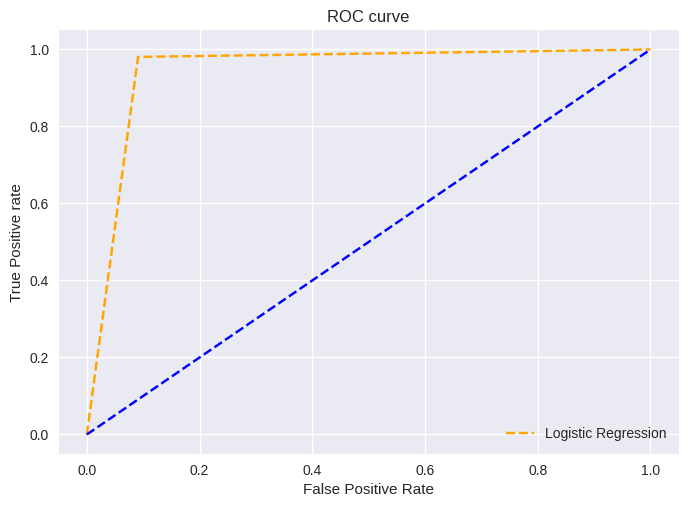

In [28]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC_LR',dpi=300)
plt.show();